In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time
from census import Census
from us import states
import gmaps
from config import gkey
import scipy.stats as stats
from pprint import pprint
import gmaps.datasets


In [2]:
#Open/read CSV file and look at table head()
death_pd_base = pd.read_csv("Causes_of_Death.csv")
death_pd_base.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2012,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,21,2.6
1,2016,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.7
2,2013,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Vermont,30,3.8
3,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,District of Columbia,23,3.8
4,2014,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Arizona,325,4.1


In [42]:
#Create table with mean of Age-adjusted death rates per cause from 1999-2016
#Drop "All causes" to focus on 10 leading causes
ppcauses = death_pd_base.groupby(["Year", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
leadcause = ppcauses.drop("All causes", axis=1)
means = leadcause.mean()
leadcause = pd.DataFrame(means).reset_index()
leadcause.columns = ["Cause Name", "Rate"]
leadcause.sort_values('Rate',inplace=True)
leadcause

,Cause Name,Rate
8,Suicide,13.235470
6,Kidney disease,14.139423
5,Influenza and pneumonia,18.389103
3,Diabetes,23.471902
0,Alzheimer's disease,24.618697
9,Unintentional injuries,42.827671
1,CLRD,44.644658
7,Stroke,46.358333
2,Cancer,179.898825
4,Heart disease,199.782372


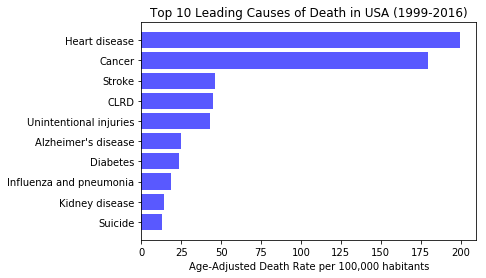

In [43]:
#Create a horizontal bar plot on descending order to show leading causes of death in USA
x = leadcause["Cause Name"]
y = leadcause["Rate"]

plt.barh(x, y, color='blue', alpha=0.65, align="center")
plt.title("Top 10 Leading Causes of Death in USA (1999-2016)")
plt.xlabel("Age-Adjusted Death Rate per 100,000 habitants")
plt.savefig("Leading Causes of Death USA.png")
plt.show()

In [44]:
#Group the years and plot the trend of the diseases in each group of years
bins = [1998, 2005, 2011, 2016]
group_names = ["1999-2004", "2005-2010", "2011-2016"]

death_pd["Year Range"] =death_pd_base(death_pd_base["Year"], bins, labels=group_names)
death_by_year = death_pd.groupby(["Year Range", "Cause Name"]).sum()["Deaths"].unstack(level=-1)
death_by_year

TypeError: 'DataFrame' object is not callable

In [45]:
deaths_year = death_pd.groupby(["Year Range", "Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)
deaths_year

KeyError: 'Year Range'

In [46]:
deaths_year = deaths_year.drop("All causes", axis=1)
deaths_year

NameError: name 'deaths_year' is not defined

In [ ]:
#Plot the trend of the diseases in each group of years
deaths_year.plot(kind="line")

# Null Hypothesis #1

-The trend observed for Heart disease and Cancer (meaning, the decrease on age-adjusted death rate per 100,000 habitants) does not represent a significant change. 

In [11]:
#Test the null hypothesis with T-test
heart_disease=["Cause Name":heart disease]
cancer=["Cause Name":cancer]
stats.ttest_1samp(heart_disease, cancer.mean())

SyntaxError: invalid syntax (<ipython-input-11-87a00679b582>, line 2)

In [12]:
#Create a table showing data per year on each State during 1999-2016
death_pd= death_pd_base[death_pd_base['Cause Name'] != 'All causes'] 
by_state= death_pd[['State','Cause Name','Deaths']] 
grouped= by_state.groupby(['State', 'Cause Name'])
grouped.sum()

#grouped_state=pd.DataFrame(grouped.sum())
#grouped_state.plot(kind="bar",)


Deaths
State         Cause Name                     
Alabama       Alzheimer's disease       26637
              CLRD                      47778
              Cancer                   180780
              Diabetes                  24143
              Heart disease            227433
              Influenza and pneumonia   18516
              Kidney disease            18899
              Stroke                    51507
              Suicide                   11241
              Unintentional injuries    43168
Alaska        Alzheimer's disease        1204
              CLRD                       3093
              Cancer                    15032
              Diabetes                   1790
              Heart disease             12107
              Influenza and pneumonia     933
              Kidney disease              729
              Stroke                     3107
              Suicide                    2680
              Unintentional injuries     6308
Arizona       Alzheimer's disease       35799
              CLRD                      52730
              Cancer                   184958
              Diabetes                  25235
              Heart disease            193063
              Influenza and pneumonia   18208
              Kidney disease             9361
              Stroke                    42078
              Suicide                   18258
              Unintentional injuries    53960
...                                       ...
West Virginia Alzheimer's disease        9736
              CLRD                      25603
              Cancer                    84714
              Diabetes                  14206
              Heart disease             97595
              Influenza and pneumonia    8331
              Kidney disease             8211
              Stroke                    20640
              Suicide                    5220
              Unintentional injuries    21105
Wisconsin     Alzheimer's disease       28927
              CLRD                      44901
              Cancer                   199267
              Diabetes                  22902
              Heart disease            213527
              Influenza and pneumonia   19868
              Kidney disease            16859
              Stroke                    52386
              Suicide                   12890
              Unintentional injuries    46497
Wyoming       Alzheimer's disease        2280
              CLRD                       5771
              Cancer                    16598
              Diabetes                   2146
              Heart disease             17668
              Influenza and pneumonia    2110
              Kidney disease             1110
              Stroke                     4059
              Suicide                    2092
              Unintentional injuries     5565

[520 rows x 1 columns]

In [13]:
#Create a table with mean of age-adjusted rate per State and disease during 1999-2016 period

death_pd= death_pd_base[death_pd_base['Cause Name'] != 'All causes']
by_state_adr= death_pd[['State','Cause Name','Year','Age-adjusted Death Rate']]
grouped= by_state.groupby(['State', 'Cause Name'])

grouped.first()
by_state_adr=pd.DataFrame(death_pd[['State','Cause Name','Age-adjusted Death Rate']])




death_by_state_adr= death_pd.groupby(["State","Cause Name"]).mean()["Age-adjusted Death Rate"].unstack(level=-1)

death_by_state_adr



Cause Name,Alzheimer's disease,CLRD,Cancer,Diabetes,Heart disease,Influenza and pneumonia,Kidney disease,Stroke,Suicide,Unintentional injuries
State,,,,,,,,,,
Alabama,30.544444,52.216667,196.150000,26.766667,256.183333,21.233333,21.205556,58.566667,13.088889,50.794444
Alaska,21.677778,43.794444,179.105556,22.261111,162.661111,14.338889,10.605556,48.572222,21.605556,56.500000
Arizona,31.238889,45.294444,158.483333,21.344444,171.805556,17.016667,8.505556,38.144444,16.594444,48.855556
Arkansas,25.916667,53.483333,198.750000,26.222222,242.627778,24.022222,19.911111,59.583333,15.111111,48.550000
California,26.094444,39.005556,161.994444,21.538889,187.833333,20.233333,7.761111,46.294444,9.855556,29.522222
Colorado,28.605556,50.261111,153.961111,17.194444,152.172222,15.977778,10.366667,41.961111,17.244444,44.694444
Connecticut,16.127778,33.844444,168.161111,16.488889,177.850000,16.983333,13.261111,35.805556,8.655556,35.233333
Delaware,19.566667,42.477778,190.072222,22.550000,206.272222,16.555556,15.450000,43.577778,11.438889,38.844444
District of Columbia,18.572222,25.294444,200.083333,29.122222,250.450000,14.844444,11.911111,39.677778,5.683333,35.444444


In [14]:
#Create a heat map showing deaths rates for Heart Disease
death_pd= death_pd_base[death_pd_base['Cause Name'] == 'Heart disease']
by_heartdisease= death_pd[['State','Cause Name','Age-adjusted Death Rate']] 
grouped= by_heartdisease.groupby(['State', 'Cause Name'])



by_heartdisease_grouped = by_heartdisease.groupby(["State"])
by_heartdisease_df=pd.DataFrame(by_heartdisease_grouped.sum())
by_heartdisease_df.reset_index(level='State',inplace=True)
by_heartdisease_df.head()


,State,Age-adjusted Death Rate
0,Alabama,4611.3
1,Alaska,2927.9
2,Arizona,3092.5
3,Arkansas,4367.3
4,California,3381.0


In [15]:
coord_states = {"Alabama": [32.806671, -86.791130], "Alaska": [61.370716, -152.404419],
"Arizona": [33.729759, -111.431221], "Arkansas": [34.969704, -92.373123],
"California": [36.116203, -119.681564], "Colorado": [39.059811, -105.311104],
"Connecticut": [41.597782, -72.755371], "Delaware": [39.318523, -75.507141],
"District of Columbia": [38.897438, -77.026817], "Florida": [27.766279, -81.686783],
"Georgia": [33.040619, -83.643074], "Hawaii": [21.094318, -157.498337],
"Idaho": [44.240459, -114.478828], "Illinois": [40.349457, -88.986137],
"Indiana": [39.849426, -86.258278], "Iowa": [42.011539, -93.210526],
"Kansas": [38.526600, -96.726486], "Kentucky": [37.668140, -84.670067],
"Louisiana": [31.169546, -91.867805], "Maine": [44.693947, -69.381927],
"Maryland": [39.063946, -76.802101], "Massachusetts": [42.230171, -71.530106],
"Michigan": [43.326618, -84.536095], "Minnesota": [45.694454, -93.900192],
"Mississippi": [32.741646, -89.678696], "Missouri": [38.456085, -92.288368],
"Montana": [46.921925, -110.454353], "Nebraska": [41.125370, -98.268082],
"Nevada": [38.313515, -117.055374], "New Hampshire": [43.452492, -71.563896],
"New Jersey": [40.298904, -74.521011], "New Mexico": [34.840515, -106.248482],
"New York": [42.165726, -74.948051], "North Carolina": [35.630066, -79.806419],
"North Dakota": [47.528912, -99.784012], "Ohio": [40.388783, -82.764915],
"Oklahoma": [35.565342, -96.928917], "Oregon": [44.572021, -122.070938],
"Pennsylvania": [40.590752, -77.209755], "Rhode Island": [41.680893, -71.511780],
"South Carolina": [33.856892, -80.945007], "South Dakota": [44.299782, -99.438828],
"Tennessee": [35.747845, -86.692345], "Texas": [31.054487, -97.563461],
"Utah": [40.150032, -111.862434], "Vermont": [44.045876, -72.710686],
"Virginia": [37.769337, -78.169968], "Washington": [47.400902, -121.490494],
"West Virginia": [38.491226, -80.954453], "Wisconsin": [44.268543, -89.616508],
"Wyoming": [42.755966, -107.302490]}

coord_states_df = pd.DataFrame(coord_states)
coord_states_df = coord_states_df.T.reset_index()
coord_states_df.columns = ["State", "Lat", "Lon"]
heartdisease_df = pd.merge(by_heartdisease_df, coord_states_df, on='State')
locations = heartdisease_df[["Lat", "Lon"]].astype(float)
heartdisease = heartdisease_df["Age-adjusted Death Rate"].astype(float)

heartdisease_df.head()



,State,Age-adjusted Death Rate,Lat,Lon
0,Alabama,4611.3,32.806671,-86.791130
1,Alaska,2927.9,61.370716,-152.404419
2,Arizona,3092.5,33.729759,-111.431221
3,Arkansas,4367.3,34.969704,-92.373123
4,California,3381.0,36.116203,-119.681564


In [31]:
coord_states1 = []
for state in coord_states:
    coord_states1.append(coord_states[state])

list_heartdisease = list(heartdisease)
int_heartdisease = []
for i in range(len(list_heartdisease)):
    int_heartdisease.append(float(list_heartdisease[i])/50)

In [32]:

    
fig = gmaps.figure()

heartdisease_layer = gmaps.heatmap_layer(locations, weights=int_heartdisease, dissipating=False, max_intensity=100,
                                   point_radius=3, gradient=['white','yellow','red'])






fig.add_layer(heartdisease_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [25]:
#Create a heat map showing deaths rates for Cancer


death_pd= death_pd_base[death_pd_base['Cause Name'] == 'Cancer']
by_cancer= death_pd[['State','Cause Name','Age-adjusted Death Rate']] 



by_cancer_grouped = by_cancer.groupby(["State"])
by_cancer_df=pd.DataFrame(by_cancer_grouped.sum())
by_cancer_df.reset_index(level='State',inplace=True)
by_cancer_df.head()


,State,Age-adjusted Death Rate
0,Alabama,3530.7
1,Alaska,3223.9
2,Arizona,2852.7
3,Arkansas,3577.5
4,California,2915.9


In [26]:
coord_states = {"Alabama": [32.806671, -86.791130], "Alaska": [61.370716, -152.404419],
"Arizona": [33.729759, -111.431221], "Arkansas": [34.969704, -92.373123],
"California": [36.116203, -119.681564], "Colorado": [39.059811, -105.311104],
"Connecticut": [41.597782, -72.755371], "Delaware": [39.318523, -75.507141],
"District of Columbia": [38.897438, -77.026817], "Florida": [27.766279, -81.686783],
"Georgia": [33.040619, -83.643074], "Hawaii": [21.094318, -157.498337],
"Idaho": [44.240459, -114.478828], "Illinois": [40.349457, -88.986137],
"Indiana": [39.849426, -86.258278], "Iowa": [42.011539, -93.210526],
"Kansas": [38.526600, -96.726486], "Kentucky": [37.668140, -84.670067],
"Louisiana": [31.169546, -91.867805], "Maine": [44.693947, -69.381927],
"Maryland": [39.063946, -76.802101], "Massachusetts": [42.230171, -71.530106],
"Michigan": [43.326618, -84.536095], "Minnesota": [45.694454, -93.900192],
"Mississippi": [32.741646, -89.678696], "Missouri": [38.456085, -92.288368],
"Montana": [46.921925, -110.454353], "Nebraska": [41.125370, -98.268082],
"Nevada": [38.313515, -117.055374], "New Hampshire": [43.452492, -71.563896],
"New Jersey": [40.298904, -74.521011], "New Mexico": [34.840515, -106.248482],
"New York": [42.165726, -74.948051], "North Carolina": [35.630066, -79.806419],
"North Dakota": [47.528912, -99.784012], "Ohio": [40.388783, -82.764915],
"Oklahoma": [35.565342, -96.928917], "Oregon": [44.572021, -122.070938],
"Pennsylvania": [40.590752, -77.209755], "Rhode Island": [41.680893, -71.511780],
"South Carolina": [33.856892, -80.945007], "South Dakota": [44.299782, -99.438828],
"Tennessee": [35.747845, -86.692345], "Texas": [31.054487, -97.563461],
"Utah": [40.150032, -111.862434], "Vermont": [44.045876, -72.710686],
"Virginia": [37.769337, -78.169968], "Washington": [47.400902, -121.490494],
"West Virginia": [38.491226, -80.954453], "Wisconsin": [44.268543, -89.616508],
"Wyoming": [42.755966, -107.302490]}

coord_states_df = pd.DataFrame(coord_states)
coord_states_df = coord_states_df.T.reset_index()
coord_states_df.columns = ["State", "Lat", "Lon"]
cancer_df = pd.merge(by_cancer_df, coord_states_df, on='State')
locations = cancer_df[["Lat", "Lon"]].astype(float)
cancer = cancer_df["Age-adjusted Death Rate"].astype(float)

cancer_df.head()



,State,Age-adjusted Death Rate,Lat,Lon
0,Alabama,3530.7,32.806671,-86.791130
1,Alaska,3223.9,61.370716,-152.404419
2,Arizona,2852.7,33.729759,-111.431221
3,Arkansas,3577.5,34.969704,-92.373123
4,California,2915.9,36.116203,-119.681564


In [29]:
coord_states1 = []
for state in coord_states:
    coord_states1.append(coord_states[state])

list_cancer = list(cancer)
int_cancer = []
for i in range(len(list_cancer)):
    int_cancer.append(int(list_cancer[i])/50)
    
fig = gmaps.figure()

cancer_layer = gmaps.heatmap_layer(locations, weights=int_cancer, dissipating=False, max_intensity=100,
                                 point_radius=3, gradient=['white','yellow','red'])






fig.add_layer(cancer_layer)


fig

Figure(layout=FigureLayout(height='420px'))

# Null Hypothesis #2

-The suicide rate is not significantly relate to lower temperatures throught the year.

In [ ]:
#Create a table with mean of age-adjusted rate per State and suicide



In [ ]:
#Create a heat map showing deaths rates for suicide



In [ ]:
#Test the null hypothesis with ANOVA test?



In [ ]:
#Do a map with most common age-adjusted cause of death by state in these 15 years

